In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import LeaveOneOut
import category_encoders as ce
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import catboost as ctb
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
import mlflow
from pycaret.regression import *
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor, RandomForestRegressor
# from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [2]:
df = pd.read_excel(r'C:\\Users\\a0a06pn\\Documents\\R&A\\Market Prediction\\Model Trial\\ModelData.xlsx', sheet_name='Data')

In [3]:
# df[df.isna().any(axis=1)].shape
df.shape

(2333, 18)

In [4]:
# df = df[(df['Region']=='SOUTH') & (~df['Greenwich_Base Rate P10'].isna())]
df = df[(~df['Greenwich_Base Rate P10'].isna()) & (df['DataPts']>3)] # Passing data for all regions ********************
# df = df[(~df['Greenwich_Base Rate P10'].isna()) & (df['KFData']==1)]

In [5]:
df.shape

(1304, 18)

In [6]:
X = df[['Year', 'BLSName', 'Region', 'CPI value', 'Unemployement rate',
       'Job Openings', 'ECI value', 'Greenwich_Base Rate P10',
       'Greenwich_Base Rate P25', 'Greenwich_Base Rate P50',
       'Greenwich_Base Rate P75', 'Greenwich_Base Rate P90']]
y = df[['KFP50']]

In [7]:
# encoder = ce.LeaveOneOutEncoder(cols=['BLSName']).fit(X,y)
encoder = ce.OneHotEncoder(cols=['BLSName']).fit(X,y)

In [8]:
numeric_dataset = encoder.transform(X,y)

In [10]:
X_train = numeric_dataset[numeric_dataset['Year']!=2022]
X_test = numeric_dataset.drop(X_train.index)

y_train = df[df['Year']!=2022]['KFP50']
y_test = df.drop(X_train.index)['KFP50']
# test = numeric_dataset[numeric_dataset['Year']==2022]

In [11]:
# numeric_dataset[1702:1703]
X_train[702:703]
# df[1702:1703]

,Year,BLSName_1,BLSName_2,BLSName_3,BLSName_4,BLSName_5,BLSName_6,BLSName_7,BLSName_8,BLSName_9,...,Region,CPI value,Unemployement rate,Job Openings,ECI value,Greenwich_Base Rate P10,Greenwich_Base Rate P25,Greenwich_Base Rate P50,Greenwich_Base Rate P75,Greenwich_Base Rate P90
1154,2021,0,0,0,0,0,0,0,0,0,...,MIDWEST,252.242,6.087063,369.833333,145.5,10.82,11.3,12.74,14.18,16.71


In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(978, 337)
(326, 337)
(978,)
(326,)


In [13]:
X_train.head()

,Year,BLSName_1,BLSName_2,BLSName_3,BLSName_4,BLSName_5,BLSName_6,BLSName_7,BLSName_8,BLSName_9,...,Region,CPI value,Unemployement rate,Job Openings,ECI value,Greenwich_Base Rate P10,Greenwich_Base Rate P25,Greenwich_Base Rate P50,Greenwich_Base Rate P75,Greenwich_Base Rate P90
0,2019,1,0,0,0,0,0,0,0,0,...,SOUTH,246.265,3.524818,575.416667,135.8,9.38,9.98,11.36,14.33,16.39
1,2019,0,1,0,0,0,0,0,0,0,...,MIDWEST,237.776,4.183675,274.833333,135.7,9.68,10.22,11.45,14.40,16.42
2,2019,0,0,1,0,0,0,0,0,0,...,SOUTH,246.265,3.574411,232.083333,135.8,9.59,9.86,12.41,13.82,15.63
3,2019,0,0,0,1,0,0,0,0,0,...,WEST,270.350,3.725036,102.083333,140.9,10.45,10.94,11.63,14.00,16.17
4,2019,0,0,0,0,1,0,0,0,0,...,NORTHEAST,269.392,3.850174,389.166667,140.7,10.22,11.24,12.62,14.72,17.15


In [14]:
y_train.head()

0    10.119231
1    10.000000
2    10.407452
3    12.000000
4    11.600000
Name: KFP50, dtype: float64

In [15]:
X_train = X_train.iloc[:, ~X_train.columns.isin(["Region"])]
X_test = X_test.iloc[:, ~X_test.columns.isin(["Region"])]

In [16]:
# # Writing out eh encoded data 
# pd.concat([numeric_dataset,X_train,y_test,df.drop(y_train.index)['BLSName']],axis=1).to_csv('Data.csv')

In [17]:
# # Scaling
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_scaled = scaler.transform(X_train)
# X_train = X_scaled
# X_train

## Testing PyCaret

In [18]:
train_df = pd.concat([X_train,y_train],axis=1)
test_df = pd.concat([X_test,y_test],axis=1)
print(train_df.shape,test_df.shape)

(978, 337) (326, 337)


In [19]:
data = pd.concat([numeric_dataset,y],axis=1)

s = setup(train_df, target = 'KFP50', transformation=False, test_data=test_df)

best = compare_models()

evaluate_model(best)

pred_holdout = predict_model(best)

new_data = data.copy().drop('KFP50', axis=1)
predictions = predict_model(best,data=new_data)

save_model(best, 'best_pipeline')

,Description,Value
0,Session id,7769
1,Target,KFP50
2,Target type,Regression
3,Original data shape,"(1304, 337)"
4,Transformed data shape,"(1304, 337)"
5,Transformed train set shape,"(978, 337)"
6,Transformed test set shape,"(326, 337)"
7,Numeric features,336
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.3645,0.2452,0.4909,0.7430,0.0385,0.0314,8.0020
catboost,CatBoost Regressor,0.3714,0.2566,0.5001,0.7325,0.0389,0.0319,7.1810
br,Bayesian Ridge,0.3863,0.2590,0.5029,0.7299,0.0395,0.0334,0.0520
ridge,Ridge Regression,0.3874,0.2598,0.5035,0.7288,0.0395,0.0335,0.0390
xgboost,Extreme Gradient Boosting,0.3764,0.2615,0.5062,0.7253,0.0395,0.0324,0.5450
gbr,Gradient Boosting Regressor,0.3892,0.2818,0.5247,0.7076,0.0406,0.0334,0.3060
omp,Orthogonal Matching Pursuit,0.4401,0.3381,0.5750,0.6454,0.0450,0.0380,0.0570
rf,Random Forest Regressor,0.3920,0.3556,0.5857,0.6370,0.0451,0.0333,0.4160
et,Extra Trees Regressor,0.3813,0.3685,0.5958,0.6282,0.0458,0.0321,0.5890
lightgbm,Light Gradient Boosting Machine,0.4181,0.3647,0.5965,0.6280,0.0459,0.0356,14.5780


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.4524,0.3858,0.6211,0.6720,0.0429,0.0336


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Year', 'BLSName_1', 'BLSName_2',
                                              'BLSName_3', 'BLSName_4',
                                              'BLSName_5', 'BLSName_6',
                                              'BLSName_7', 'BLSName_8',
                                              'BLSName_9', 'BLSName_10',
                                              'BLSName_11', 'BLSName_12',
                                              'BLSName_13', 'BLSName_14',
                                              'BLSName_15', 'BLSName_16',
                                              'BLSName_17', 'BLSName_18',
                                              'BLSName_19', 'BLSName_20...
                                              'BLSName_23', 'BLSName_24',
                                              'BLSName_25', 'BLSName_26',
                                 

## Sklearn based Ensembles

In [20]:
# X_train = df[df['Year']!=2022]
# X_test = df.drop(X_train.index)

# y_train = df[df['Year']!=2022]['MarketP50']
# y_test = df.drop(X_train.index)['MarketP50']
# test = numeric_dataset[numeric_dataset['Year']==2022]

In [21]:
# numeric_dataset[1702:1703]
X_train[702:703]
# df[1702:1703]

,Year,BLSName_1,BLSName_2,BLSName_3,BLSName_4,BLSName_5,BLSName_6,BLSName_7,BLSName_8,BLSName_9,...,BLSName_326,CPI value,Unemployement rate,Job Openings,ECI value,Greenwich_Base Rate P10,Greenwich_Base Rate P25,Greenwich_Base Rate P50,Greenwich_Base Rate P75,Greenwich_Base Rate P90
1154,2021,0,0,0,0,0,0,0,0,0,...,0,252.242,6.087063,369.833333,145.5,10.82,11.3,12.74,14.18,16.71


In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(978, 336)
(326, 336)
(978,)
(326,)


In [23]:
# X_train = X_train[['Year', 'BLSName', 'CPI value', 'Unemployement rate',
#        'Job Openings', 'ECI value', 'Greenwich_Base Rate P10',
#        'Greenwich_Base Rate P25', 'Greenwich_Base Rate P50',
#        'Greenwich_Base Rate P75', 'Greenwich_Base Rate P90']]

In [24]:
# X_test = X_test[['Year', 'BLSName', 'CPI value', 'Unemployement rate',
#        'Job Openings', 'ECI value', 'Greenwich_Base Rate P10',
#        'Greenwich_Base Rate P25', 'Greenwich_Base Rate P50',
#        'Greenwich_Base Rate P75', 'Greenwich_Base Rate P90']]

In [25]:
# from sklearn.preprocessing import PowerTransformer
# pt = PowerTransformer()
# pt.fit

In [26]:
def Ridge_run():
    with mlflow.start_run():
        mlflow.log_params(params)

        clf = Ridge(alpha=1.0)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        mlflow.log_metric('R2', metrics.r2_score(y_test, y_pred))
        # mlflow.sklearn.log_model(clf, 'model', signature = infer_signature(X_train,y_pred))
        mlflow.sklearn.autolog()

        print(metrics.r2_score(y_test, y_pred))
        print(metrics.mean_absolute_error(y_test, y_pred))
        print(metrics.mean_absolute_percentage_error(y_test, y_pred))

In [27]:
!mlflow ui

^C


In [36]:
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.r2_score(y_test, y_pred))
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_absolute_percentage_error(y_test, y_pred))

0.6719863764442708
0.45242997368946286
0.03360198460719019


In [28]:
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.r2_score(y_test, y_pred))
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_absolute_percentage_error(y_test, y_pred))

0.663361666691872
0.47212702805520673
0.03523885530798188


In [29]:
y_pred = clf.predict(X_train)

In [30]:
Adjr2 = 1-(1-metrics.r2_score(y_train, y_pred))*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)
Adjr2

0.8510352231984273

In [31]:
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators = 100, random_state = 0)

# Fitting the Random Forest Regression model to the data
model.fit(X_train, y_train)
# Predicting the target values of the test set
y_pred = model.predict(X_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)
print(metrics.r2_score(y_test, y_pred))


RMSE:  0.759
0.5106614036085246


for rand_value_1 in range(100):
    reg=GradientBoostingRegressor(loss='squared_error',random_state=rand_value_1)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    print(metrics.r2_score(y_test, y_pred))

In [32]:
reg=GradientBoostingRegressor(loss='squared_error')
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(metrics.r2_score(y_test, y_pred))
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_absolute_percentage_error(y_test, y_pred))

0.5263618971176776
0.5743203046929302
0.042742510378986576


In [33]:
reg2=GradientBoostingRegressor(loss='absolute_error', criterion = 'squared_error')
reg2.fit(X_train,y_train)
y_pred = reg2.predict(X_test)
print(metrics.r2_score(y_test, y_pred))
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_absolute_percentage_error(y_test, y_pred))

0.4657868586174846
0.5964331608777388
0.044464276017707284


In [34]:
reg3=ExtraTreesRegressor()
reg3.fit(X_train,y_train)
y_pred = reg3.predict(X_test)
print(metrics.r2_score(y_test, y_pred))


0.5711622129936376


In [35]:
reg4=AdaBoostRegressor()
reg4.fit(X_train,y_train)
y_pred = reg4.predict(X_test)
print(metrics.r2_score(y_test, y_pred))

0.35422917492245776


## Testing CatBoostRegressor

In [20]:
cat_features = [1]
model_CBR = ctb.CatBoostRegressor()
model_CBR.fit(X_train, y_train, cat_features)

Learning rate set to 0.040799
0:	learn: 1.1343316	total: 340ms	remaining: 5m 39s
1:	learn: 1.1066583	total: 516ms	remaining: 4m 17s
2:	learn: 1.0794133	total: 677ms	remaining: 3m 45s
3:	learn: 1.0519892	total: 833ms	remaining: 3m 27s
4:	learn: 1.0257925	total: 1.04s	remaining: 3m 26s
5:	learn: 1.0015436	total: 1.22s	remaining: 3m 21s
6:	learn: 0.9792350	total: 1.41s	remaining: 3m 20s
7:	learn: 0.9565455	total: 1.59s	remaining: 3m 17s
8:	learn: 0.9340235	total: 1.79s	remaining: 3m 16s
9:	learn: 0.9136889	total: 1.96s	remaining: 3m 14s
10:	learn: 0.8950847	total: 2.18s	remaining: 3m 15s
11:	learn: 0.8760067	total: 2.35s	remaining: 3m 13s
12:	learn: 0.8597165	total: 2.54s	remaining: 3m 12s
13:	learn: 0.8436440	total: 2.74s	remaining: 3m 13s
14:	learn: 0.8276952	total: 2.95s	remaining: 3m 13s
15:	learn: 0.8125820	total: 3.15s	remaining: 3m 13s
16:	learn: 0.7991203	total: 3.34s	remaining: 3m 13s
17:	learn: 0.7854926	total: 3.49s	remaining: 3m 10s
18:	learn: 0.7731907	total: 3.67s	remaining:

In [21]:
expected_y  = y_test
predicted_y = model_CBR.predict(X_test)

In [22]:
# X_train

0.4365697687482788
0.7072077263056069


<Axes: xlabel='MarketP50'>

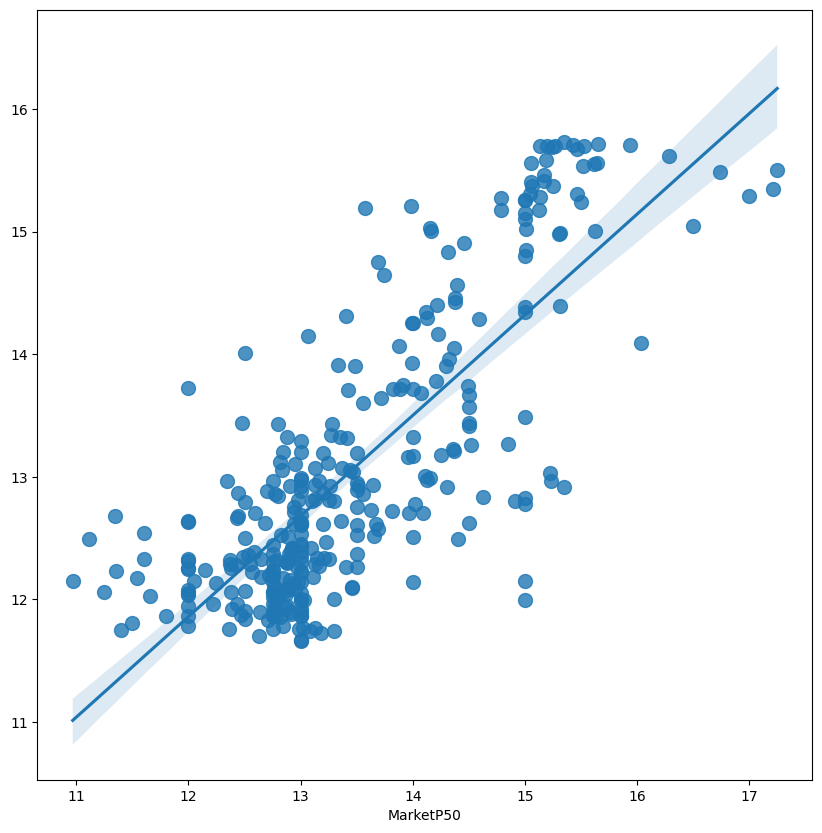

In [23]:
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_error(expected_y, predicted_y))

plt.figure(figsize=(10,10))
sns.regplot(x=expected_y, y=predicted_y, fit_reg=True, scatter_kws={"s": 100})

### CatBoostRegressor Feature Importance

Text(0.5, 1.0, 'Feature Importance')

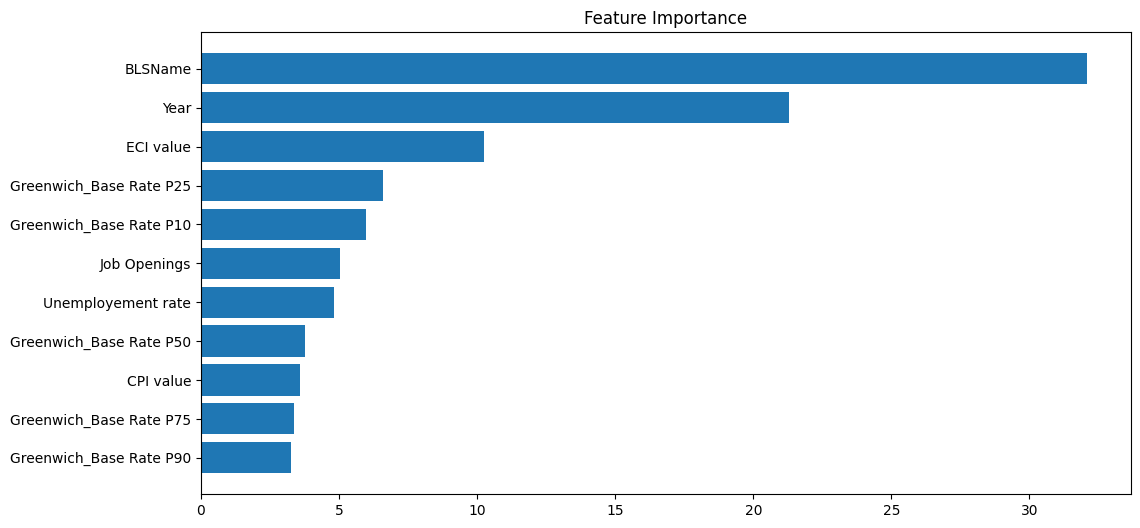

In [ ]:
feature_importance = model_CBR.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')


In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(978, 11)
(326, 11)
(978,)
(326,)


In [75]:
y_test

1763    12.500
1765    12.500
1768    14.000
1771    12.360
1772    12.290
         ...  
2327    14.902
2328    13.000
2329    12.500
2330    15.450
2331    13.040
Name: KFP50, Length: 327, dtype: float64

In [76]:
y_pred

array([11.43980511, 12.07035564, 12.5145052 , 12.30168008, 11.39757873,
       12.30357617, 11.43980511, 11.4285031 , 12.51474805, 12.33911238,
       11.39757873, 11.54642941, 11.4285031 , 11.40185587, 12.5145052 ,
       12.5145052 , 12.5145052 , 12.51474805, 11.39757873, 12.18160058,
       11.52023667, 11.40185587, 11.39757873, 12.67781132, 12.47109809,
       12.33157646, 11.60113165, 12.5145052 , 12.07119351, 12.26673295,
       12.18160058, 12.5145052 , 12.57956771, 11.39757873, 12.57956771,
       11.40185587, 11.43980511, 12.5145052 , 11.43980511, 12.57956771,
       11.43980511, 12.07119351, 12.26673295, 12.23355979, 12.57956771,
       12.30168008, 12.27368335, 11.60113165, 12.18160058, 11.47163637,
       11.43980511, 12.24829153, 11.47163637, 12.30168008, 12.23355979,
       11.66732129, 11.39757873, 11.58640496, 12.57956771, 11.43980511,
       12.5145052 , 12.18160058, 11.40185587, 11.54642941, 12.30168008,
       12.47109809, 11.53797484, 12.45273947, 11.47163637, 12.26

In [58]:
df[1702:1703]

,Year,BLSName,Region,CPI value,Unemployement rate,Job Openings,ECI value,Greenwich_Base Rate P10,Greenwich_Base Rate P25,Greenwich_Base Rate P50,Greenwich_Base Rate P75,Greenwich_Base Rate P90,MarketP50,MarketP75
1722,2021,"Visalia, CA",WEST,287.494,7.318984,1006.0,151.4,12.74,13.22,14.18,15.63,17.67,14.279808,14.744952


## SHAP Values

In [28]:
import shap

In [31]:
shap_values = shap.TreeExplainer(reg.shap_values(X_train))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(25, 25))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
pip install linearmodels

In [83]:
import pickle

In [84]:
with open('best_pipeline.pkl', 'rb') as f:
    data = pickle.load(f)

In [86]:
data

array(['Year', 'BLSName', 'CPI value', 'Unemployement rate',
       'Job Openings', 'ECI value', 'Greenwich_Base Rate P10',
       'Greenwich_Base Rate P25', 'Greenwich_Base Rate P50',
       'Greenwich_Base Rate P75', 'Greenwich_Base Rate P90'], dtype=object)

In [87]:
df2 = pd.read_pickle('best_pipeline.pkl')

In [90]:
df2

array(['Year', 'BLSName', 'CPI value', 'Unemployement rate',
       'Job Openings', 'ECI value', 'Greenwich_Base Rate P10',
       'Greenwich_Base Rate P25', 'Greenwich_Base Rate P50',
       'Greenwich_Base Rate P75', 'Greenwich_Base Rate P90'], dtype=object)

In [92]:
from pycaret.regression import load_model
loaded_model = load_model('best_pipeline')
loaded_model
y_pred1 = loaded_model.predict(X_train)
print(metrics.r2_score(y_train, y_pred1))
print(metrics.mean_absolute_error(y_train, y_pred1))
print(metrics.mean_absolute_percentage_error(y_train, y_pred1))

Transformation Pipeline and Model Successfully Loaded


0.9185268491646676
0.2195518839186014
0.01892462056464661


In [101]:
df.dtypes

Year                         int64
BLSName                     object
Region                      object
CPI value                  float64
Unemployement rate         float64
Job Openings               float64
ECI value                  float64
Greenwich_Base Rate P10    float64
Greenwich_Base Rate P25    float64
Greenwich_Base Rate P50    float64
Greenwich_Base Rate P75    float64
Greenwich_Base Rate P90    float64
MarketP50                  float64
MarketP75                  float64
KFP50                      float64
dtype: object

In [102]:
X_train.dtypes

Year                         int64
BLSName                    float64
CPI value                  float64
Unemployement rate         float64
Job Openings               float64
ECI value                  float64
Greenwich_Base Rate P10    float64
Greenwich_Base Rate P25    float64
Greenwich_Base Rate P50    float64
Greenwich_Base Rate P75    float64
Greenwich_Base Rate P90    float64
dtype: object

In [20]:
X_train.describe()[3:8]

,Year,BLSName,CPI value,Unemployement rate,Job Openings,ECI value,Greenwich_Base Rate P10,Greenwich_Base Rate P25,Greenwich_Base Rate P50,Greenwich_Base Rate P75,Greenwich_Base Rate P90
min,2019.0,9.119952,105.697,2.100138,13.250000,135.7,9.0100,9.38,9.83,10.40,11.42
25%,2020.0,11.500000,246.265,3.983005,109.666667,139.2,9.6025,9.92,10.91,12.68,15.41
50%,2020.0,11.957933,252.242,5.629924,194.250000,144.0,9.8600,10.34,11.30,13.22,16.11
75%,2021.0,12.606210,270.350,7.295640,340.000000,145.6,10.3000,10.94,11.84,14.18,17.06
max,2021.0,19.500000,319.761,13.515765,3872.333333,151.4,17.0700,17.07,17.07,25.24,25.24


In [21]:
X_test.describe()[3:8]

,Year,BLSName,CPI value,Unemployement rate,Job Openings,ECI value,Greenwich_Base Rate P10,Greenwich_Base Rate P25,Greenwich_Base Rate P50,Greenwich_Base Rate P75,Greenwich_Base Rate P90
min,2022.0,9.619952,123.784,2.066726,23.333333,152.8,9.86,9.86,9.86,11.30,13.21
25%,2022.0,11.000641,272.401,2.942071,157.416667,152.8,9.86,11.30,11.42,13.70,15.63
50%,2022.0,11.361667,283.666,3.641819,262.583333,152.9,10.58,11.30,12.74,14.18,17.07
75%,2022.0,11.974183,303.320,4.024691,430.416667,157.0,11.30,12.68,13.52,15.63,17.25
max,2022.0,16.250000,344.416,5.359046,1233.416667,159.5,14.18,15.63,17.07,19.47,27.16


<Axes: xlabel='Greenwich_Base Rate P10', ylabel='Proportion'>

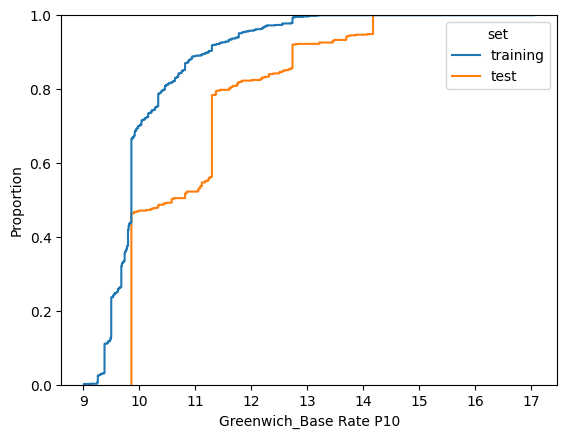

In [22]:
feature_name = 'Greenwich_Base Rate P10'

df = pd.DataFrame({
    feature_name:np.concatenate((X_train.loc[:,feature_name],X_test.loc[:,feature_name])),
    'set':['training']*X_train.shape[0] + ['test']*X_test.shape[0]
    })
sns.ecdfplot(data=df,x=feature_name,hue='set')

<Axes: xlabel='Greenwich_Base Rate P25', ylabel='Proportion'>

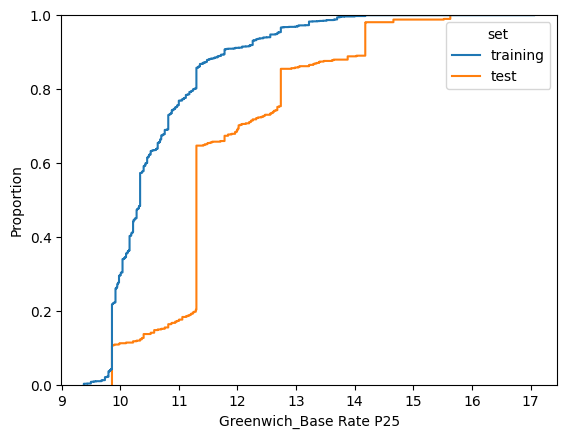

In [23]:
feature_name = 'Greenwich_Base Rate P25'

df = pd.DataFrame({
    feature_name:np.concatenate((X_train.loc[:,feature_name],X_test.loc[:,feature_name])),
    'set':['training']*X_train.shape[0] + ['test']*X_test.shape[0]
    })
sns.ecdfplot(data=df,x=feature_name,hue='set')

<Axes: xlabel='Greenwich_Base Rate P50', ylabel='Proportion'>

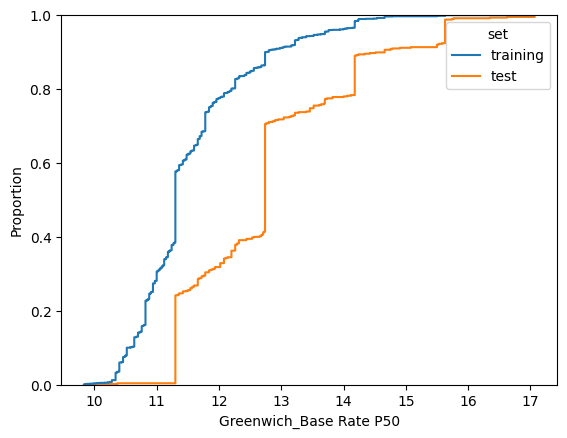

In [24]:
feature_name = 'Greenwich_Base Rate P50'

df = pd.DataFrame({
    feature_name:np.concatenate((X_train.loc[:,feature_name],X_test.loc[:,feature_name])),
    'set':['training']*X_train.shape[0] + ['test']*X_test.shape[0]
    })
sns.ecdfplot(data=df,x=feature_name,hue='set')

<Axes: xlabel='ECI value', ylabel='Proportion'>

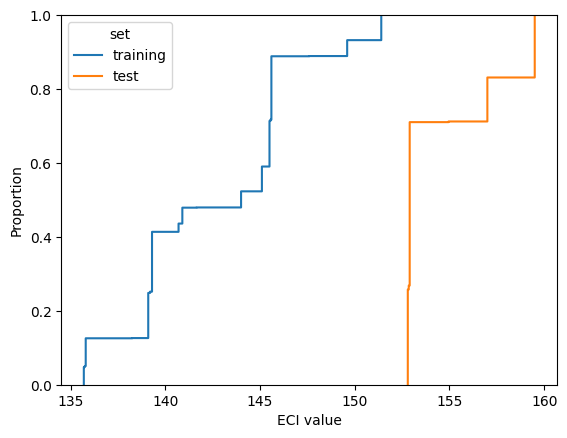

In [35]:
feature_name = 'ECI value'

df = pd.DataFrame({
    feature_name:np.concatenate((X_train.loc[:,feature_name],X_test.loc[:,feature_name])),
    'set':['training']*X_train.shape[0] + ['test']*X_test.shape[0]
    })
sns.ecdfplot(data=df,x=feature_name,hue='set')

In [25]:
from scipy.stats import ks_2samp

In [26]:
ks_2samp(X_train.loc[:,feature_name],X_test.loc[:,feature_name]).statistic

0.4586455438602927

In [31]:
for feature_name in X_train.columns:
    print(feature_name,":",ks_2samp(X_train.loc[:,feature_name],X_test.loc[:,feature_name]).statistic)

Year : 1.0
BLSName : 0.34225814702606416
CPI value : 0.7666830733234894
Unemployement rate : 0.642923890436142
Job Openings : 0.24651766161321256
ECI value : 1.0
Greenwich_Base Rate P10 : 0.4388984509466437
Greenwich_Base Rate P25 : 0.603814904377724
Greenwich_Base Rate P50 : 0.4586455438602927
Greenwich_Base Rate P75 : 0.4374738232299918
Greenwich_Base Rate P90 : 0.29566833688471217
